C:\Users\aksha\AppData\Local\Temp\ipykernel_10112\121851395.py:43: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


C:\Users\aksha\AppData\Local\Temp\ipykernel_10112\121851395.py:43: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

✅ Saved NIFTY_50 data to ../data/raw\NIFTY_50.csv



C:\Users\aksha\AppData\Local\Temp\ipykernel_10112\121851395.py:43: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

✅ Saved GOLD data to ../data/raw\GOLD.csv



C:\Users\aksha\AppData\Local\Temp\ipykernel_10112\121851395.py:43: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

✅ Saved CRUDE_OIL data to ../data/raw\CRUDE_OIL.csv



C:\Users\aksha\AppData\Local\Temp\ipykernel_10112\121851395.py:43: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)


✅ Saved USD_INR data to ../data/raw\USD_INR.csv


[*********************100%***********************]  1 of 1 completed


✅ Saved US10Y_YIELD data to ../data/raw\US10Y_YIELD.csv


C:\Users\aksha\AppData\Local\Temp\ipykernel_10112\121851395.py:43: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\aksha\AppData\Local\Temp\ipykernel_10112\121851395.py:43: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

✅ Saved SP500 data to ../data/raw\SP500.csv
✅ Saved INDIA_VIX data to ../data/raw\INDIA_VIX.csv



C:\Users\aksha\AppData\Local\Temp\ipykernel_10112\121851395.py:43: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Saved DXY data to ../data/raw\DXY.csv

📁 Combined data saved to ../data/raw\all_data.csv


C:\Users\aksha\AppData\Local\Temp\ipykernel_10112\121851395.py:98: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df_all.pct_change().dropna()



📈 Correlation of each with NIFTY_50:
NIFTY_50       1.000000
SP500          0.327993
US10Y_YIELD    0.138950
CRUDE_OIL      0.087640
GOLD           0.049842
DXY           -0.118737
USD_INR       -0.216106
INDIA_VIX     -0.416065
Name: NIFTY_50, dtype: float64


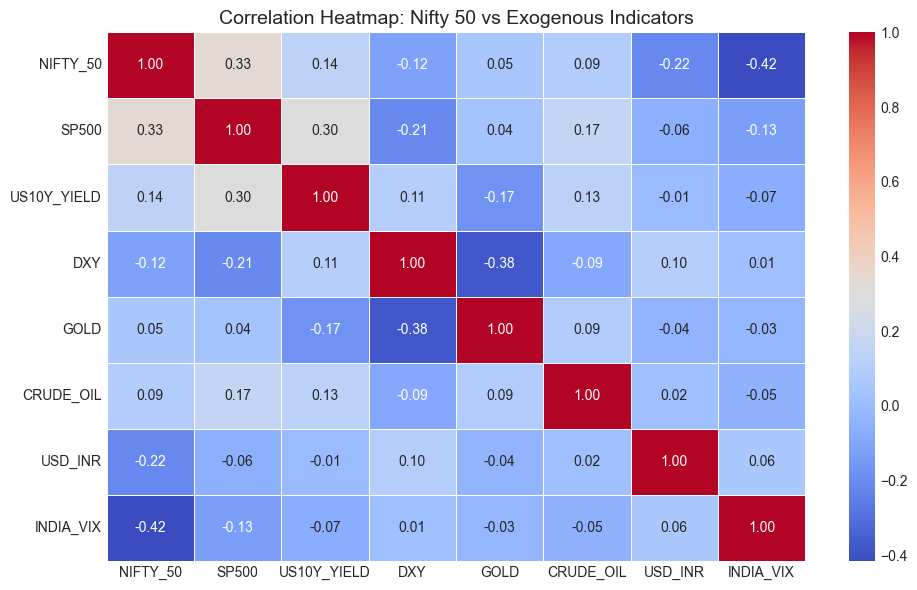

In [14]:
# ============================================================
# 📦 1. Imports
# ============================================================
import os
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

# ============================================================
# 📁 2. Ensure data directory exists
# ============================================================
raw_data_path = "../data/raw"
os.makedirs(raw_data_path, exist_ok=True)

# ============================================================
# 🧠 3. Define Tickers (Yahoo Finance symbols)
# ============================================================
tickers = {
    "NIFTY_50": "^NSEI",
    "GOLD": "GC=F",
    "CRUDE_OIL": "CL=F",
    "USD_INR": "INR=X",
    "US10Y_YIELD": "^TNX",
    "SP500": "^GSPC",
    "INDIA_VIX": "^INDIAVIX",
    "DXY": "DX-Y.NYB"
}

# ============================================================
# 📅 4. Download Historical Data and Save Raw CSVs
# ============================================================
data = {}
start_date = "2000-01-01"
end_date = "2026-01-21"

for name, symbol in tickers.items():
    print(f"Downloading {name} data...")
    df = yf.download(symbol, start=start_date, end=end_date)

    csv_path = os.path.join(raw_data_path, f"{name}.csv")
    df.to_csv(csv_path)
    print(f"✅ Saved {name} data to {csv_path}")

    # Keep only closing prices (Series OR DataFrame-safe)
    close = df["Close"]
    data[name] = close if isinstance(close, pd.Series) else close.squeeze()

# ============================================================
# 🧩 5. Combine All Data and Save  (✅ CORRECTED PART ONLY)
# ============================================================

# Use NIFTY_50 as the master calendar (Series-safe → DataFrame)
df_all = data["NIFTY_50"].rename("NIFTY_50").to_frame()
df_all = df_all.sort_index()

us_markets = ["SP500", "US10Y_YIELD", "DXY", "GOLD", "CRUDE_OIL"]

for market in us_markets:
    temp = data[market].rename(market).to_frame().sort_index()
    df_all = pd.merge_asof(
        df_all,
        temp,
        left_index=True,
        right_index=True,
        direction="backward"
    )

# Add remaining India-aligned markets
df_all["USD_INR"] = data["USD_INR"]
df_all["INDIA_VIX"] = data["INDIA_VIX"]

df_all.index.name = "Date"

combined_csv_path = os.path.join(raw_data_path, "all_data.csv")
df_all.to_csv(combined_csv_path)
print(f"\n📁 Combined data saved to {combined_csv_path}")

# ============================================================
# ⚙️ 6. Reload Clean Data (Skip Metadata if Needed)
# ============================================================
df_all = pd.read_csv(
    combined_csv_path,
    header=0,
    index_col=0,
    parse_dates=True
)

df_all = df_all.apply(pd.to_numeric, errors="coerce")

# ============================================================
# 📊 7. Compute Daily Returns and Correlation
# ============================================================
returns = df_all.pct_change().dropna()
corr_matrix = returns.corr()

print("\n📈 Correlation of each with NIFTY_50:")
nifty_corr = corr_matrix.loc[:, "NIFTY_50"].sort_values(ascending=False)
print(nifty_corr)

# ============================================================
# 🎨 8. Plot Correlation Heatmap
# ============================================================
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title(
    "Correlation Heatmap: Nifty 50 vs Exogenous Indicators",
    fontsize=14
)
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

# ============================================================
# 📂 Step 1: Load the file properly
# ============================================================

file_path = "../data/raw/all_data.csv"  # path to your file

# Skip only the 2nd row (tickers) and use the 3rd row as headers
df_all = pd.read_csv(file_path, skiprows=[1,2], header=0)

# Strip spaces and clean column names
df_all.columns = df_all.columns.str.strip()

# ============================================================
# 🔧 Step 2: Rename and filter columns
# ============================================================

# Rename 'Unnamed: 0' to 'Date'
df_all = df_all.rename(columns={'Unnamed: 0': 'Date'})

# Keep only Date, SP500, INDIA_VIX, and DXY columns
columns_to_keep = ['Date','NIFTY_50', 'SP500', 'INDIA_VIX', 'USD_INR']
df_filtered = df_all[columns_to_keep]

# ============================================================
# 💾 Step 3: Save the filtered data
# ============================================================

# Save to CSV file
output_path = "../data/raw/correlation_info.csv"
df_filtered.to_csv(output_path, index=False)

print("✅ Final columns after filtering:")
print(df_filtered.columns.tolist())

print("\n📊 Preview of filtered data:")
print(df_filtered.head())

print(f"\n📏 Shape of filtered dataframe: {df_filtered.shape}")

print(f"\n💾 File saved successfully to: {output_path}")

✅ Final columns after filtering:
['Date', 'NIFTY_50', 'SP500', 'INDIA_VIX', 'USD_INR']

📊 Preview of filtered data:
         Date     NIFTY_50        SP500  INDIA_VIX    USD_INR
0  2007-09-19  4732.350098  1529.030029        NaN  40.033001
1  2007-09-20  4747.549805  1518.750000        NaN  39.615002
2  2007-09-21  4837.549805  1525.750000        NaN  39.770000
3  2007-09-24  4932.200195  1517.729980        NaN  39.431000
4  2007-09-25  4938.850098  1517.209961        NaN  39.660000

📏 Shape of filtered dataframe: (4498, 5)

💾 File saved successfully to: ../data/raw/correlation_info.csv
